# **Mathematical tools for Quantitative Finance**
---
<br>
 
- Copyright (c) Lukas Gonon, 2024. All rights reserved

- Author: Lukas Gonon <l.gonon@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

This notebook contains extra material.

In [1]:
import numpy as np
import matplotlib.pylab as plt
plt.style.use('dark_background')
import time
import pandas as pd

## Session Overview

- Vectorisation of functions
- Convolutions of functions
- Numerical integration
- Optimisation and root finding

## The importance of vectorisation

### Reminder on variable types

In [2]:
xr = range(5)
xl = list(xr)
xa = np.array(xr)
print(xr, type(xr))
print(xl, type(xl))
print(xa, type(xa))

range(0, 5) <class 'range'>
[0, 1, 2, 3, 4] <class 'list'>
[0 1 2 3 4] <class 'numpy.ndarray'>


In [3]:
for x in xr:
    print(x)
print("******************")

for x in xl:
    print(x)
    
print("******************")
for x in xa:
    print(x)

0
1
2
3
4
******************
0
1
2
3
4
******************
0
1
2
3
4


In [4]:
print(xa, " and ",  2.1*xa)

[0 1 2 3 4]  and  [0.  2.1 4.2 6.3 8.4]


In [8]:
print(xl, " and ",  2.1*xl)

TypeError: can't multiply sequence by non-int of type 'float'

In [10]:
print(xr, " and ",  2*xr)

TypeError: unsupported operand type(s) for *: 'int' and 'range'

TAKE-HOME MESSAGE: 
- Use np.array() for computations
- Use lists and ranges for listing or iterations

### Unary functions

Consider a simple function $g(x) = \cos(x)$, that we wish to apply to a vector $(x_i)_{i=1,\ldots, n}$, for $n$ large.
We can either do so by looping over all values of x, or apply the function directly to the vector $x$.
A unary function acts on a single argument, such as np.exp(), np.cos(), np.sqrt()....
They can however be extended to numpy arrays directly, and map the function to the array.

In [11]:
def g(x):
    return np.cos(x)

In [12]:
xx = np.random.normal(0., 1., 10)
xx

array([ 0.73838409,  2.32533593, -0.17471874, -0.61194641,  0.19240181,
        0.00987858, -0.26719476,  1.28846067,  0.36232974,  1.64499455])

In [13]:
n = 1000000
xx = np.random.normal(0., 1., n)

## Apply the function cos() to a list
t0 = time.time()
yyLoop = [] ## Creates an empty list
for x in xx:
    yyLoop.append(g(x)) ## Adds new element to the list
dtLoop = time.time() - t0

## Apply the vectorised version of the function cos() to a list
t0 = time.time()
yy1 = np.cos(xx)
dt1 = time.time() - t0

## Same, but directly to the function g()
t0 = time.time()
yy2 = g(xx)
dt2 = time.time() - t0

df = pd.DataFrame([dtLoop, dt1, dt2], index=["Loop", "cos", "g"], columns=["Time (seconds)"])
df.head()

,Time (seconds)
Loop,1.922781
cos,0.022507
g,0.022695


Note: these built-in `numpy` functions can be applied (element by element) to arrays of any sizes:

In [25]:
xxx = np.random.normal(0., 1.,  (3, 3, 3))
yyy = np.exp(xxx)
yyy

array([[[0.25383918, 0.93287585, 2.53472005],
        [0.47635285, 1.8213485 , 0.81677944],
        [0.49060366, 4.98738041, 2.36985928]],

       [[3.12192716, 1.55375376, 0.27332556],
        [0.40028979, 0.25266564, 1.72565493],
        [0.48650761, 0.95397717, 0.72150172]],

       [[1.24110909, 0.90999833, 0.09967247],
        [5.86054096, 0.48053698, 3.89152165],
        [2.62683236, 6.1801272 , 1.21422005]]])

### Binary functions

A binary function acts on two arguments, such as np.maximum(), np.multiply(), np.power(). 
Again, they are naturally extended to functions on arrays by operating component-wise.

In [15]:
xx = np.random.normal(0., 1., 2)
yy = np.random.normal(0., 1., 2)
print("xx = ", xx)
print("yy = ", yy)

np.add(xx,yy)

xx =  [ 0.85457135 -0.4115738 ]
yy =  [-0.09181232 -0.2969802 ]


array([ 0.76275903, -0.708554  ])

In [16]:
xx = np.random.normal(0., 1., (2,2))
yy = np.random.normal(0., 1., (1,2))
print("xx = ")
print(np.round(xx, 2))
print("yy = ")
print(np.round(yy, 2))

print("max = ")
print(np.round(np.maximum(xx, yy), 2))

xx = 
[[1.64 0.36]
 [0.41 1.42]]
yy = 
[[ 0.93 -0.47]]
max = 
[[1.64 0.36]
 [0.93 1.42]]


When the two dimensions are not identical, `numpy` operates on shape-like-wise dimensions. This is called broadcasting.

### Sequential functions

They apply to arrays directly, for example np.mean(), np.std(), np.sum(), np.max().

In [21]:
xx = np.random.normal(0., 1., 10)
print("the 1D array is ",xx)
print("Sum over a one-dimensional array: ", np.sum(xx))


xx = np.random.normal(0., 1., (4, 6))
print("the multi-dimensional array is ",xx)

print("Sum over a multi-dimensional array: ", np.sum(xx))

the 1D array is  [-1.30447444 -2.11629417  0.52469428  0.33337352  0.93658821  1.43539556
 -0.09819084  0.49456497  0.04173683  0.85567869]
Sum over a one-dimensional array:  1.1030725875166931
the multi-dimensional array is  [[ 0.32519078  0.56081855  0.21990794  0.47568287 -0.0751639  -1.83315256]
 [-1.91317786 -0.37101834  1.54393276  0.69007094  0.95466167  0.53557252]
 [ 1.96209178  2.08508475  1.15258644 -0.06211508  1.44296687  0.0104359 ]
 [ 1.19205985 -0.43607253 -1.77878862 -0.01270404  0.65907311 -0.59151683]]
Sum over a multi-dimensional array:  6.736426981049779


*Exercise: Compare np.sum(xx) vs sum(xx) vs loop*

#### What about other Python functions???

In [26]:
def compareRunTimes(aa):
    mm, tt = [], []

    t0 = time.time() #Loop1
    m = 0.
    for a in aa:
        m = m + a
    dt = time.time() - t0
    mm.append(m)
    tt.append(dt)

    t0 = time.time()  #Loop2
    m = 0.
    for a in aa:
        m += a
    dt = time.time() - t0
    mm.append(m)
    tt.append(dt)

    t0 = time.time()  #Built-in
    m = sum(aa)
    dt = time.time() - t0
    mm.append(m)
    tt.append(dt)

    t0 = time.time()  #numpy
    m = np.sum(aa, dtype=np.int64)
    dt = time.time() - t0
    mm.append(m)
    tt.append(dt)
    
    df = pd.DataFrame(list(zip(mm, tt)), index=["Loop", "Loop2", "Built-in", "numpy"], columns = ["Sum", "Time"])
    return df

In [27]:
N = 5000000

In [30]:
aa = np.random.rand(N) ## Creates a Numpy array of random numbers between 0 and 1
print("Vector of type ", type(aa))

df = compareRunTimes(aa)
df.head()

Vector of type  <class 'numpy.ndarray'>


,Sum,Time
Loop,2.500321e+06,0.671044
Loop2,2.500321e+06,0.717549
Built-in,2.500321e+06,0.503226
numpy,0.000000e+00,0.007340


In [31]:
aa = range(N) ## Creates a range of integers
print("Vector of type ", type(aa))
df = compareRunTimes(aa)
df.head()

Vector of type  <class 'range'>


,Sum,Time
Loop,1.250000e+13,0.370906
Loop2,1.250000e+13,0.378360
Built-in,1.250000e+13,0.118179
numpy,1.250000e+13,0.730632


In [32]:
aa = range(N) ## Creates a range of integers
print("Vector of type ", type(aa))
df = compareRunTimes(aa)
df.head()

Vector of type  <class 'range'>


,Sum,Time
Loop,1.250000e+13,0.367258
Loop2,1.250000e+13,0.377093
Built-in,1.250000e+13,0.116815
numpy,1.250000e+13,0.674106


**Note:** the same holds for *sum*, *max*, *min*, *mean*...

Warning `numpy` can return some overflow for integers

In [33]:
a = 2**63 - 1

ar = np.array(a, dtype=np.int64)
ar2 = np.array(a)
print(a, a+1)
print(ar, ar+1)
print(ar2, ar2+1)

9223372036854775807 9223372036854775808
9223372036854775807 -9223372036854775808
9223372036854775807 -9223372036854775808


###  The axis keyword

It allows to apply a function to a slice of a multi-dimensional array.

In [34]:
xx = np.random.normal(0., 1., (4, 10000000))
print("Dimensions of xx: ", xx.shape)

Dimensions of xx:  (4, 10000000)


In [35]:
t0 = time.time()
xSum = []
for i in range(xx.shape[0]):
    xSum.append(np.sum(xx[i,:]))
dt = time.time() - t0
print("Sum = ", np.round(xSum, 4), "--- Computation time: ", np.round(dt, 5), " seconds")

t0 = time.time()
xSum2 = np.sum(xx, axis=1) 
dt = time.time() - t0
print("Sum2 = ", np.round(xSum2, 4), "--- Computation time: ", np.round(dt, 5), " seconds")

Sum =  [ 7059.32    4833.746    923.221  -7213.2351] --- Computation time:  0.06884  seconds
Sum2 =  [ 7059.32    4833.746    923.221  -7213.2351] --- Computation time:  0.03349  seconds


Computation times are similar since we only loop over 4 elements. Suppose now the first dimension of xx is large:

In [36]:
xx = np.random.normal(0., 1., (100000, 100))
print("Dimensions of xx: ", xx.shape)

t0 = time.time()
xSum = []
for i in range(xx.shape[0]):
    xSum.append(np.sum(xx[i,:]))
dt = time.time() - t0
print(" Loop Computation time: ", np.round(dt, 5), " seconds")

t0 = time.time()
xSum = np.sum(xx, axis=1) 
dt = time.time() - t0
print("Numpy Computation time: ", np.round(dt, 5), " seconds")


Dimensions of xx:  (100000, 100)
 Loop Computation time:  0.64959  seconds
Numpy Computation time:  0.01002  seconds


### Example: Computing pairwise (Euclidean) distances

Consider two two-dimensional arrays $X\in\mathbb{R}^{d_x, n}$ and $Y\in\mathbb{R}^{d_y, n}$. We wish to compute the Euclidean distance
$$
D(X, Y)_{j,k} := \sqrt{\sum_{i=0}^{n}(X_{j,i}-Y_{k,i})^2},
$$
considering the $j$-th row of $X$ and the $k$-th row of $Y$.

The dimensions can be understood as follows for example:

- dx: number of credit lines in Portfolio X
- dy: number of credit lines in Portfolio Y
- n: number of (daily) observations for each credit line

In [37]:
n, dx, dy = 100000, 50, 100
X = np.random.normal(0., 1., (dx, n))
Y = np.random.normal(0., 1., (dy, n))

We first start by fixing one element $(j,k)=(1,1)$

In [38]:
j, k = 1, 1
t0 = time.time()
dist = np.sqrt(np.sum([(x-y)**2 for (x,y) in zip(X[j,:], Y[k,:])]))
dt = time.time() - t0
print("Distance: ", dist, " --- Computation time: ", dx*dy*dt)

t0 = time.time()
dist = np.sqrt(np.sum(((X[j,:]- Y[k,:])**2)))
dt = time.time() - t0
print("Distance: ", dist, " --- Computation time: ", dx*dy*dt)

Distance:  446.8533998198738  --- Computation time:  319.05055046081543
Distance:  446.8533998198738  --- Computation time:  38.40446472167969


In [ ]:
t0 = time.time()
X1 = X.reshape(dx, 1, n)
Y1 = Y.reshape(1, dy, n)
diffs = X1 - Y1
dists = np.sqrt(np.sum(diffs**2, axis=2))
dt = time.time() - t0
print("Distance: ", dists[j,k], " --- Computation time: ", dt)

t0 = time.time()
dists = np.sqrt(np.sum((X[:, np.newaxis] - Y[np.newaxis])**2, axis=2)) ## same as the reshaping above
dt = time.time() - t0
print("Distance: ", dists[j,k], " --- Computation time: ", dt)

As soon as the dimension $n$ gets large, the computation time becomes too large.

Optimised broadcasting:

In [ ]:
t0 = time.time()
dists = -2 * np.matmul(X, Y.T)
dists +=  np.sum(X**2, axis=1)[:, np.newaxis]
dists += np.sum(Y**2, axis=1)
di = np.sqrt(dists[j,k])
dt = time.time() - t0
print("Distance: ", di, " --- Computation time: ", dt)

### What about more involved functions?

In [ ]:
def f(x):
    if x < 0.:
        return np.cos(x)
    else:
        return np.exp(-x)

In [ ]:
xx = np.random.normal(0.,1., 5)
print(xx)
f(xx)

In [ ]:
fVec = np.vectorize(f)
N = 1000000
xx = np.random.normal(0., 1., N)

t0 = time.time()
yyLoop = []
for x in xx:
    yyLoop.append(f(x))
dtLoop = time.time() - t0

t0 = time.time()
yyv = fVec(xx)
dtv = time.time() - t0

t0 = time.time()
yyv2 = [f(x) for x in xx]
dtv2 = time.time() - t0

df = pd.DataFrame([dtLoop, dtv, dtv2], index=["Loop", "Vec", "Iter"], columns=["Time (seconds)"])
df.head()

*Note: The vectorize function is provided primarily for convenience, not for performance. The implementation is essentially a `for` loop.*

### Convolutions

In [ ]:
def newFunc(g, x):
    return g(x) ** 2

In [ ]:
print("Calling a numpy function: ", newFunc(np.cos, -2.))
print("Calling a function defined previously: ", newFunc(f, -2.))

## Numerical integration

In [40]:
from scipy.integrate import quad, simps
import matplotlib.pylab as plt
import numpy as np

GOAL: Integrate
$$
f_{\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{x^2}{2\sigma^2}\right\}.
$$
This is the probability density function of the Normal distribution with variance $\sigma^2$ and mean $0$.


If X is a random variable with Normal/Gaussian distribution with mean $\mu$ and variance $\sigma^2$, then for any $x\in\mathbb{R}$,

$$
\mathbb{P}(X\leq z) = \int_{-\infty}^{z}\frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}dx.
$$

$A>0$.
$$
\int_{-\infty}^{+\infty}f_{\sigma}(x)dx \approx \int_{-A}^{+A}f_{\sigma}(x)dx = 2\int_{0}^{+A}f_{\sigma}(x)dx
$$

In [41]:
def f(x, sig):
    return np.exp(-x*x / (2.*sig*sig)) / (sig*np.sqrt(2.*np.pi))

We wish to integrate the functions on the interval $[-10, 10]$. 
$$
\int_{-10}^{10}f_{\sigma}(x) dx
$$

**First Step: !! ALWAYS PLOT THE FUNCTION TO INTEGRATE !!**

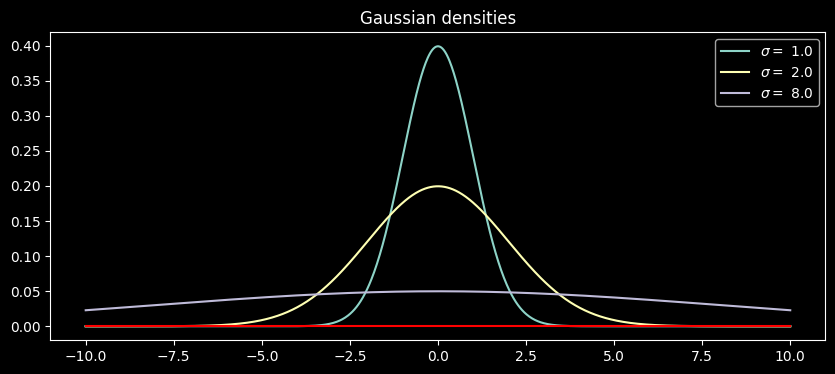

In [42]:
xMin, xMax = -10., 10.
sigma = [1., 2., 8.]
xx = np.linspace(xMin, xMax, 1000)
plt.figure(figsize=(10,4))
ff = []
for s in sigma:
    ff.append([f(x,s) for x in xx])
    plt.plot(xx, ff[-1], label='$\sigma=$ %.1f' %s)

plt.plot(xx, 0.*xx, 'r')
plt.title("Gaussian densities")
plt.legend(loc='best')
plt.show()

$$
1 = \int_{-\infty}^{+\infty}f_{\sigma}(x)dx 
=  \int_{-a}^{+a}f_{\sigma}(x)dx + \text{Error}
$$

Numerical integration documentation: 
- Simpson's rule: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html
- Adaptive quadrature: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

In [ ]:
from scipy.integrate import quad

In [ ]:
sigma

In [ ]:
print('Numerical integration for f:')

a = 20.

for i in range(len(sigma)):
    print('sigma=', sigma[i])
    qf = quad(f, -a, a, args=(sigma[i],))
    #qs = simps(ff[i], xx)
    print("Quadrature: ", qf)
    #print("Simpson: ", qs)
    print("***************************")

## Optimisation and root-finding

We investigate some of the importants routines within the scipy.optimize package https://docs.scipy.org/doc/scipy/reference/optimize.html

### Root finding

We are interested in finding the (unique?) solution to the equation
$$
f(x) = 0,
$$
over some given interval.


In [ ]:
from scipy.optimize import fsolve, root, minimize

def f(x):
    return x**2 - 1.

xx = np.linspace(-2, 4)
plt.plot(xx, [0. for x in xx], 'r')
plt.plot(xx, f(xx), 'b')
plt.show()

In [ ]:
x0temp = 5.*(2.*np.random.rand(1000)-1.) ## random number in [-5, 1]

In [ ]:
xs = []
for x0 in x0temp:
    xs.append(fsolve(f, x0=x0))
    
np.min(xs), np.max(xs)

Note that this is a local solver, that needs a starting estimate.

In [ ]:
xx = np.linspace(-2, 2, 11)
ff, ddt = [], []
for x0 in xx:
    t0 = time.time()
    fs = fsolve(f, x0=x0, xtol=1E-20)[0]
    dt = np.round(t0 - time.time() - t0, 2)
    ff.append(fs)
    ddt.append(dt)
df = pd.DataFrame(list(zip(xx, ff, ddt)), index=xx, columns = ["x0", "Solution", "Time (seconds)"])
df.set_index("x0")
print(df)

It also works in the multidimensional setting:

In [ ]:
def f(x):
    return [x[0]**2+x[1]**2-1., x[0]-x[1]]

aa = np.linspace(-1.,1.,1000)
cirP = np.sqrt(1.-aa**2)
cirM = -np.sqrt(1.-aa**2)
lin = [a for a in aa]

plt.figure(figsize=(5,5))
plt.plot(aa,cirP, 'b')
plt.plot(aa,cirM, 'b')
plt.plot(aa,lin,'r')
plt.show()

In [ ]:
x0 = [.2, .4]

print(fsolve(f, x0))

In [ ]:
print(root(f, x0))

### Optimisation

**Remark:** Root-finding problems can be recast as minimisation problem. For example, solving $f(x) = c$ can be tackled as
\begin{equation*}
\min_{x} \left[f(x)-c\right]^2.
\end{equation*}

When solving an optimisation problem of the form $\min_{x}g(x)$, we first need to consider the following question:
- Is the objective function $g$ convex?
- Is the objective function $g$ smooth, i.e. is its gradient defined everywhere?
- Are there constraints?

We could also consider 
$$
\min_{x} |f(x) - c|
$$

#### One-dimensional optimisation

$$
\min_{x} [f(x)-c]^2 = \min_{x} [x^2-1]^2
$$

In [ ]:
from scipy.optimize import minimize_scalar
def f(x):
    return x*x

def f2(x):
    c = 1.
    return (f(x)-c)**2

result = minimize_scalar(f2)
print(result)

In [ ]:
print("*******************")
result2 = minimize_scalar(f2, bounds=(-5., 5.), method='bounded')
print(result2)